In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(160, 160, 3)  # smaller size
)

base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[0][0]']      

In [16]:
# Load images with label from directory

from tensorflow.keras.utils import image_dataset_from_directory

seed = 42
train_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/train',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)

val_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/test',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)



Found 23831 files belonging to 4 classes.
Found 5950 files belonging to 4 classes.


In [17]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
# test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [18]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
745/745 [==============================] - 366s 487ms/step - loss: 0.9156 - accuracy: 0.6077 - val_loss: 0.7510 - val_accuracy: 0.6813
Epoch 2/5
745/745 [==============================] - 371s 497ms/step - loss: 0.7215 - accuracy: 0.6916 - val_loss: 0.7046 - val_accuracy: 0.7020
Epoch 3/5
745/745 [==============================] - 367s 493ms/step - loss: 0.6506 - accuracy: 0.7283 - val_loss: 0.6477 - val_accuracy: 0.7232
Epoch 4/5
745/745 [==============================] - 368s 494ms/step - loss: 0.6147 - accuracy: 0.7436 - val_loss: 0.5600 - val_accuracy: 0.7655
Epoch 5/5
745/745 [==============================] - 354s 475ms/step - loss: 0.5761 - accuracy: 0.7595 - val_loss: 0.5375 - val_accuracy: 0.7734


In [19]:
del train_ds
del val_ds

In [20]:
#export model

model.save('../exports/models/pretrained_cnn.h5')

/home/samirshrestha/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


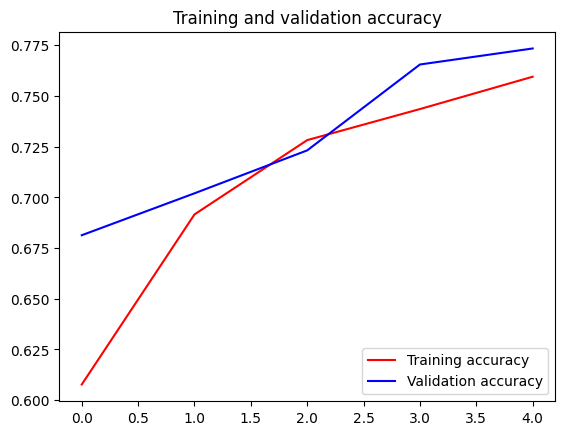

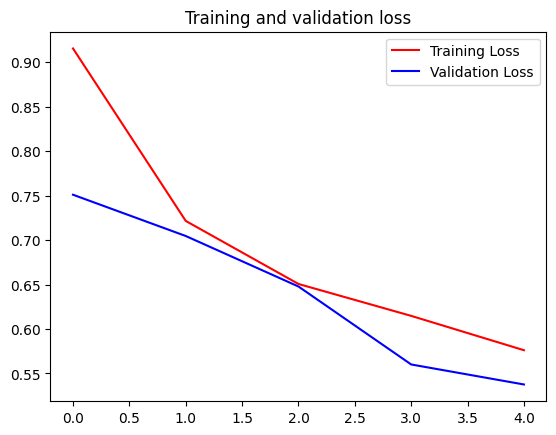

In [21]:
# Plot accuracy and loss curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

In [22]:
# Evaluate model

test_loss, test_acc = model.evaluate(val_ds)
print('Test accuracy:', test_acc)

NameError: name 'val_ds' is not defined